In [98]:
import pandas as pd
from matplotlib import pyplot as plt
from utilities import load_cotton
from utilities import load_rice

In [99]:
cotton_2021 = load_cotton("./Crop-dataset/Cotton/cotton2021.csv")
cotton_2022 = load_cotton('./Crop-dataset/Cotton/cotton2022.csv')
cotton_2023 = load_cotton("./Crop-dataset/Cotton/cotton2023.csv")

cotton_2021.shape, cotton_2022.shape, cotton_2023.shape

((2883, 13), (12411, 13), (11777, 13))

In [100]:
rice_2021 = load_rice('./Crop-dataset/Rice/rice2021.csv')
rice_2022 = load_rice("./Crop-dataset/Rice/rice2022.csv")
rice_2023 = load_rice("./Crop-dataset/Rice/rice2023.csv")

rice_2021.shape, rice_2022.shape, rice_2023.shape

((419, 13), (4687, 13), (919, 13))

In [102]:
dataset_2021 = pd.concat([cotton_2021, rice_2021])
dataset_2022 = pd.concat([cotton_2022, rice_2022])
dataset_2023 = pd.concat([cotton_2023, rice_2023])

### Plotting class distribution

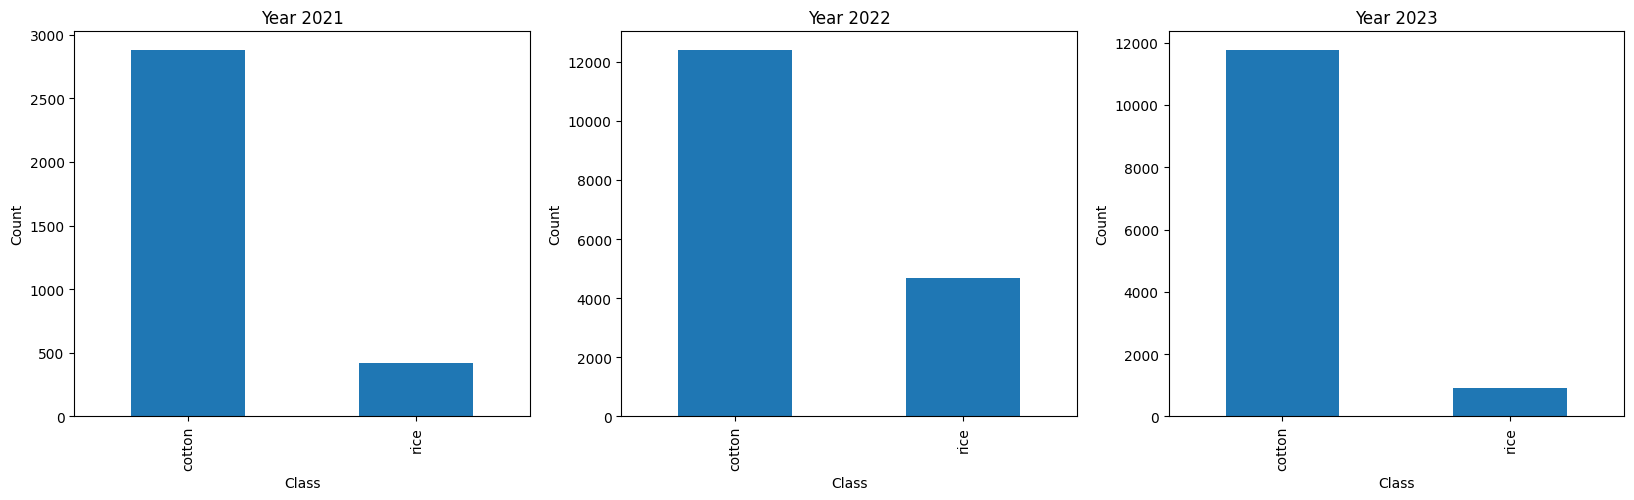

In [ ]:
from plots import draw_class_plot

plt.figure(figsize=(20, 5))
for i, (year, dataset) in enumerate(
    [("2021", dataset_2021), ("2022", dataset_2022), ("2023", dataset_2023)]
):
    draw_class_plot(dataset, f"Year {year}", is_subplot=True, subplot_index=i)

plt.show()


### Using SMOTE to resample the dataset

In [ ]:
# use SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5)
dataset_2021_resampled, y_2021_resampled = smote.fit_resample(
    dataset_2021.drop(["class"], axis=1), dataset_2021["class"]
)
dataset_2022_resampled, y_2022_resampled = smote.fit_resample(
    dataset_2022.drop(["class"], axis=1), dataset_2022["class"]
)
dataset_2023_resampled, y_2023_resampled = smote.fit_resample(
    dataset_2023.drop(["class"], axis=1), dataset_2023["class"]
)

dataset_2021_resampled["class"] = y_2021_resampled
dataset_2022_resampled["class"] = y_2022_resampled
dataset_2023_resampled["class"] = y_2023_resampled

In [ ]:
dataset_2021_resampled

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,class
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,cotton
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,cotton
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,cotton
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,cotton
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,cotton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,0.140266,0.113148,0.081930,0.097913,0.096903,0.132669,0.198119,0.571816,0.650006,0.245340,0.369955,0.546022,rice
4320,0.483490,0.354050,0.391705,0.567606,0.510389,0.026390,0.459078,0.507010,0.478684,0.557238,0.691812,0.484482,rice
4321,0.126344,0.140857,0.284117,0.615593,0.471835,0.200594,0.682785,0.756046,0.685493,0.216935,0.246027,0.226462,rice
4322,0.137469,0.431636,0.536429,0.699330,0.921584,0.464602,0.578825,0.226281,0.232303,0.367442,0.437348,0.301119,rice


### Plotting the points using PCA

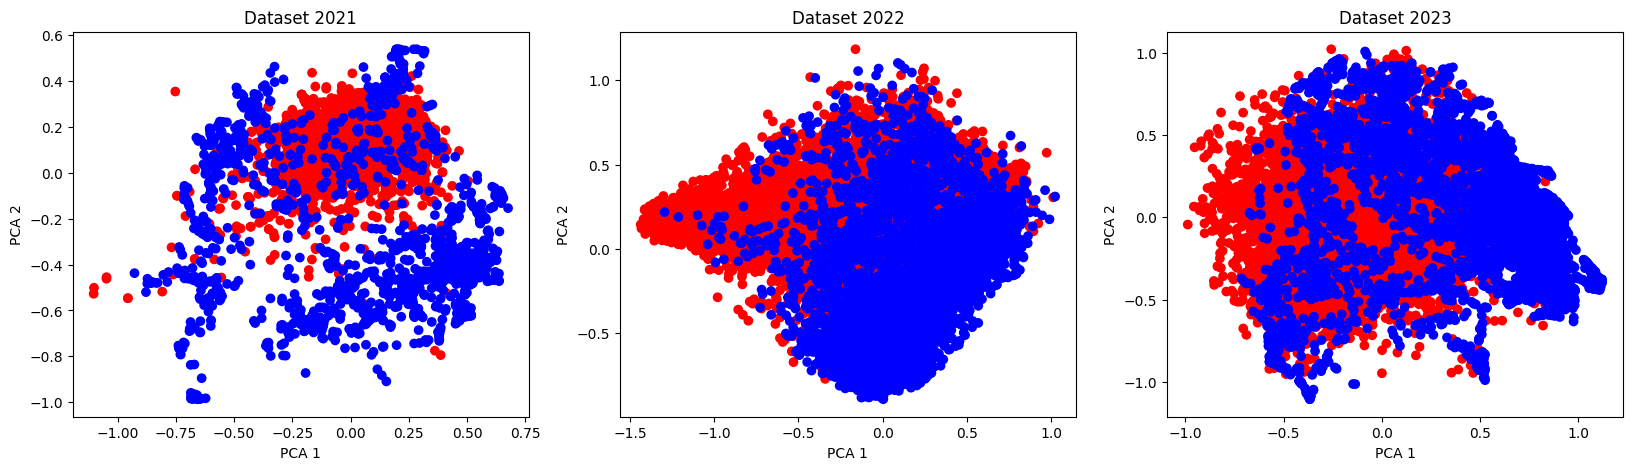

In [ ]:
from sklearn.decomposition import PCA

# gimme a 3 col one row plot
plt.figure(figsize=(20, 5))

for i, (year, dataset) in enumerate([("2021", dataset_2021_resampled), ("2022", dataset_2022_resampled), ("2023", dataset_2023_resampled)]):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(dataset.drop(['class'], axis=1))

    plt.subplot(1, 3, i + 1)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dataset['class'].map({'cotton': 'red', 'rice': 'blue'}))
    plt.title(f'Dataset {year}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

plt.show()

### Creating all the possible three splits

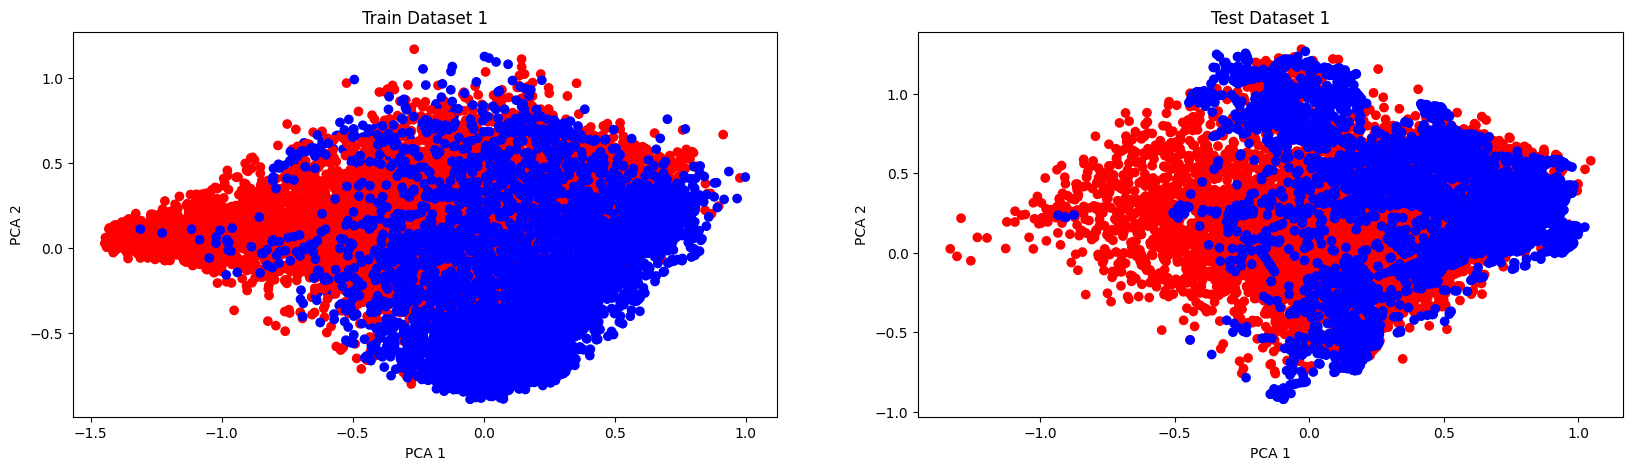

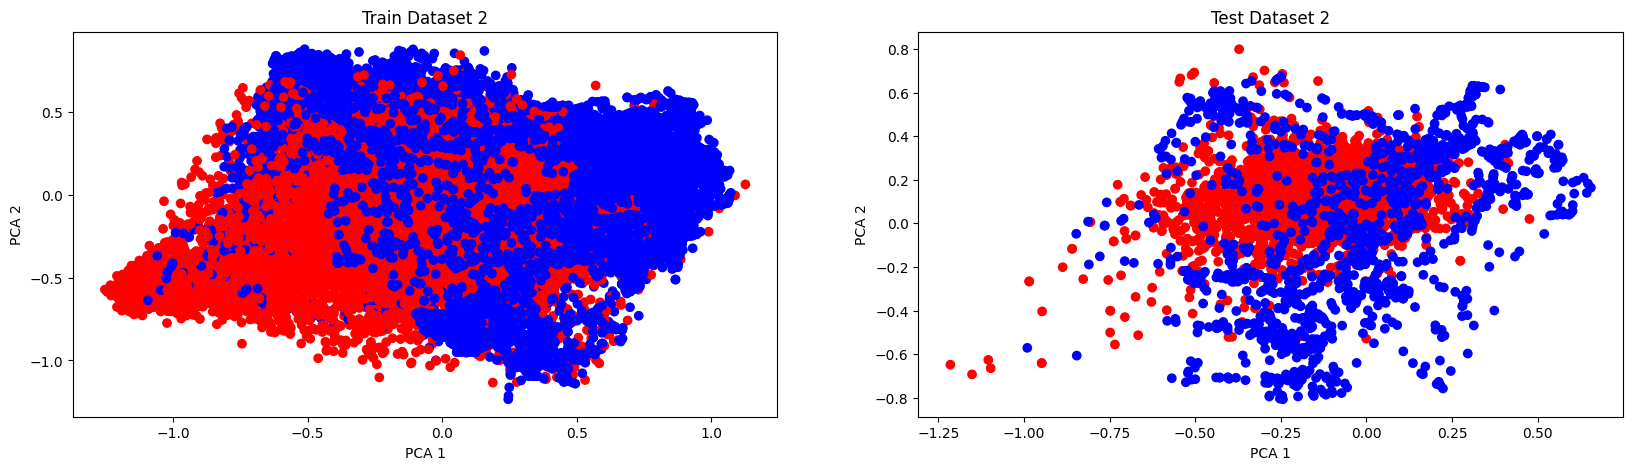

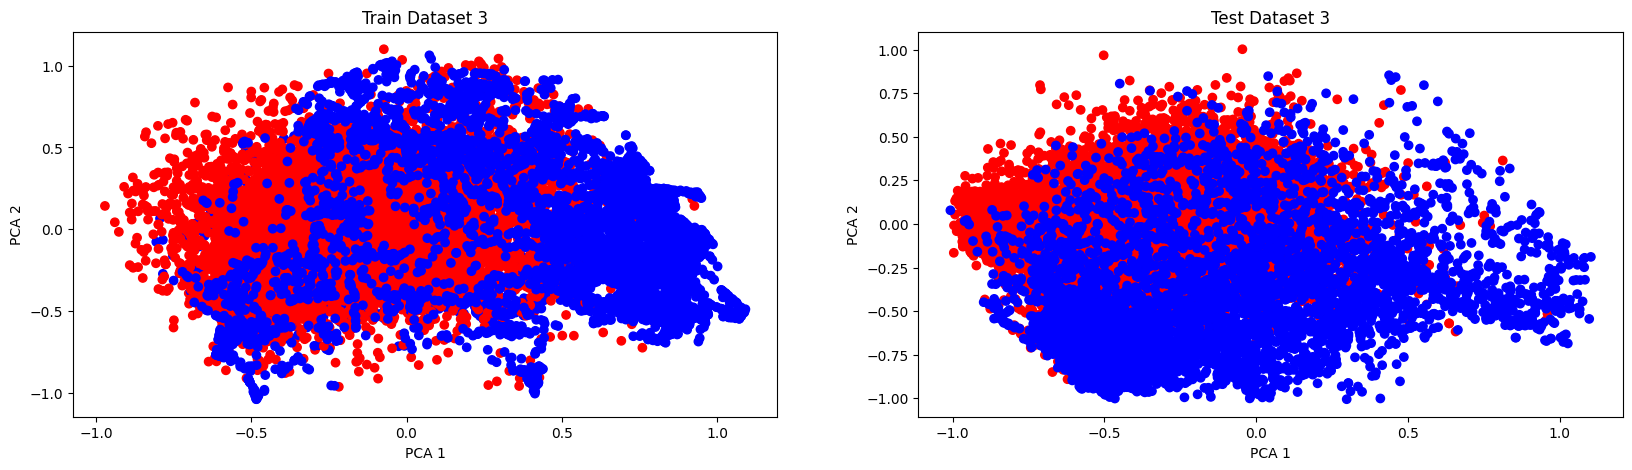

In [ ]:
cross_validation_splits = [
    (pd.concat([dataset_2021_resampled, dataset_2022_resampled]), dataset_2023_resampled),
    (pd.concat([dataset_2022_resampled, dataset_2023_resampled]), dataset_2021_resampled),
    (pd.concat([dataset_2021_resampled, dataset_2023_resampled]), dataset_2022_resampled)
]

for i, (train, test) in enumerate(cross_validation_splits):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(train.drop(['class'], axis=1))

    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train['class'].map({'cotton': 'red', 'rice': 'blue'}))
    plt.title(f'Train Dataset {i + 1}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    pca_result = pca.transform(test.drop(['class'], axis=1))

    plt.subplot(1, 2, 2)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=test['class'].map({'cotton': 'red', 'rice': 'blue'}))
    plt.title(f'Test Dataset {i + 1}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.show()
